In [1]:
!git clone https://github.com/Tarandro/BinaryML_churn.git

Cloning into 'BinaryML_churn'...
remote: Enumerating objects: 467, done.
remote: Counting objects: 100% (467/467), done.
remote: Compressing objects: 100% (313/313), done.
remote: Total 467 (delta 233), reused 375 (delta 141), pack-reused 0
Receiving objects: 100% (467/467), 5.88 MiB | 2.21 MiB/s, done.
Resolving deltas: 100% (233/233), done.


In [2]:
import os
fd = os.open( "/kaggle/working/BinaryML_churn", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/BinaryML_churn'

In [3]:
import pandas as pd
from binaryML import BinaryML

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [4]:
#####################
# Parameters
#####################

objective = 'text_binary'  # or 'text_binary'            ('binary_proba' : predict proba and 'binary' : predict 0 or 1)
target = 'sentiment'

column_text = 'text'  # (column with texts)

frac = 0.8  # train_test_split fraction                 (data is split in train/test with frac = % for training dataset)

max_run_time_per_model = 1200  # (limit gridsearch time for each model)

scoring = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']
sort_leaderboard = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']

# number of folds during gridsearch and validation :
nfolds = 5

class_weight = True

apply_stacking = False
apply_blend_model = True

thr_1_test = 0.5 # threshold for probability of 1

# show result:
print_result = True
# list of models to exclude :
exclude_model = []  # FastText work only with pre-training dataset on kaggle (see url method_embedding)
                    # Need GPU for BERT
# NLP : ['tf-idf+Naive_Bayes', 'tf-idf+SGDClassifier', 'tf-idf+Logistic_Regression', 'Fasttext_Attention', 'BERT']

method_embedding = {'Fasttext_Attention': '/kaggle/input/fasttext-french-2b-300d/cc.fr.300.vec',
                    'BERT': 'CamemBERT',
                    'spacy': [('all', False), (['ADJ', 'NOUN', 'VERB', 'DET'], False),
                              (['ADJ', 'NOUN'], True)]}

# Read Data

In [5]:
data = pd.read_csv('./data/TrustPilot_data.csv')
data = data[~data.text.isnull()].reset_index(drop=True)
data['sentiment'] = data.star.map({5: 1, 4: 1, 3: 0, 2: 0, 1: 0})
data.head()

,title,date,star,text,sentiment
0,Excellent,2021-01-02T10:01:14+00:00,5,"Très bien, service parfait et rapide.",1
1,"Bonjour,",2021-01-01T14:54:01+00:00,5,"Bonjour,J'étais bien reçue par Monsieur Antony...",1
2,Bonjour.compte bloqué,2020-12-30T20:29:03+00:00,1,"Bonjour.compte bloqué. .carte ,retrait,viremen...",0
3,ORANGE BANK ou la banque de DINGO,2020-12-30T19:22:00+00:00,1,ORANGE BANK ou votre interlocueteur est le ROB...,0
4,Très pratique,2020-12-30T17:16:37+00:00,5,"Très pratique, je peux à tout moment bloquer l...",1


In [6]:
bml = BinaryML(scoring=scoring, objective=objective, nfolds=nfolds, class_weight=class_weight,
                   print_result=print_result, max_run_time_per_model=max_run_time_per_model,
                   apply_stacking=apply_stacking, apply_blend_model=apply_blend_model, exclude_model=exclude_model,
                   method_embedding=method_embedding)

# Preprocessing

In [7]:
bml.data_preprocessing(data, target=target, column_text=column_text, frac=frac)

In [8]:
# data after preprocessing :
bml.data

,text
0,"Très bien, service parfait et rapide."
1,"Bonjour,J'étais bien reçue par Monsieur Antony..."
2,"Bonjour.compte bloqué. .carte ,retrait,viremen..."
3,ORANGE BANK ou votre interlocueteur est le ROB...
4,"Très pratique, je peux à tout moment bloquer l..."
...,...
393,Impossible d'ouvrir un compte. Bugs en plein m...
394,"Attention Orange bank fait du fishing, ils réc..."
395,Après plusieurs refus d'ouverture d'un compte ...
396,Bugs très graves de l’appli. Souvent on ne peu...


# Training


tf-idf+Naive_Bayes Model : 

  Total time : 1196.247 and n_iter : 2491
Best parameters:  {'clf__alpha': 0.15643050981592943, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8208


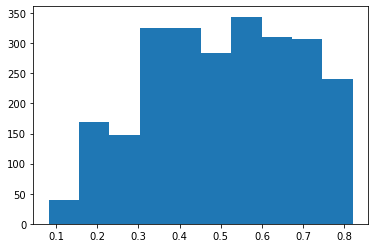

Time search : 1196.4975687390001

Cross validation score :

roc_auc = 0.8487
precision 1 = 0.9529
recall 1 = 0.7168
f1 score 1 = 0.8182

              precision    recall  f1-score   support

           0      0.863     0.980     0.918       205
           1      0.953     0.717     0.818       113

    accuracy                          0.887       318
   macro avg      0.908     0.849     0.868       318
weighted avg      0.895     0.887     0.882       318

Time validation : 0.23811146900015956

tf-idf+SGDClassifier Model : 

  Total time : 1191.38 and n_iter : 810
Best parameters:  {'clf__alpha': 0.00417118207861534, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.8633


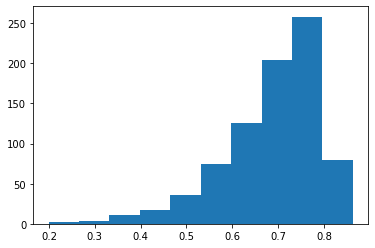

Time search : 1191.6574743390001

Cross validation score :

roc_auc = 0.9024
precision 1 = 0.8981
recall 1 = 0.8584
f1 score 1 = 0.8778

              precision    recall  f1-score   support

           0      0.924     0.946     0.935       205
           1      0.898     0.858     0.878       113

    accuracy                          0.915       318
   macro avg      0.911     0.902     0.906       318
weighted avg      0.915     0.915     0.915       318

Time validation : 0.4087309620003907

tf-idf+Logistic_Regression Model : 

  Total time : 1713.774 and n_iter : 1193
Best parameters:  {'clf__C': 0.47711152954245817, 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8576


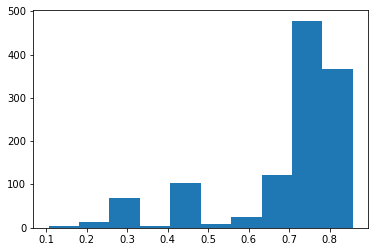

Time search : 1713.9761729739998

Cross validation score :

roc_auc = 0.8719
precision 1 = 0.9082
recall 1 = 0.7876
f1 score 1 = 0.8436

              precision    recall  f1-score   support

           0      0.891     0.956     0.922       205
           1      0.908     0.788     0.844       113

    accuracy                          0.896       318
   macro avg      0.900     0.872     0.883       318
weighted avg      0.897     0.896     0.894       318

Time validation : 0.27311525200002507

tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET Model : 

  Total time : 1195.852 and n_iter : 2492
Best parameters:  {'clf__alpha': 0.1574631185426154, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8208


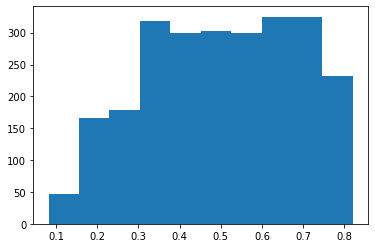

Time search : 1196.0506407350003

Cross validation score :

roc_auc = 0.8487
precision 1 = 0.9529
recall 1 = 0.7168
f1 score 1 = 0.8182

              precision    recall  f1-score   support

           0      0.863     0.980     0.918       205
           1      0.953     0.717     0.818       113

    accuracy                          0.887       318
   macro avg      0.908     0.849     0.868       318
weighted avg      0.895     0.887     0.882       318

Time validation : 0.237424017000194

tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET Model : 

  Total time : 1725.021 and n_iter : 1144
Best parameters:  {'clf__alpha': 0.0002592182381919575, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.8708


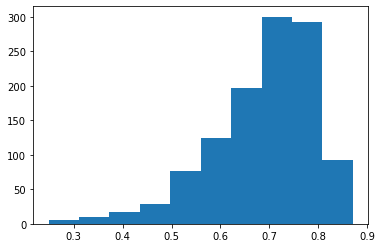

Time search : 1725.2086424339996

Cross validation score :

roc_auc = 0.855
precision 1 = 0.7899
recall 1 = 0.8319
f1 score 1 = 0.8103

              precision    recall  f1-score   support

           0      0.905     0.878     0.891       205
           1      0.790     0.832     0.810       113

    accuracy                          0.862       318
   macro avg      0.847     0.855     0.851       318
weighted avg      0.864     0.862     0.862       318

Time validation : 0.2816929680011526

tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET Model : 

  Total time : 1193.866 and n_iter : 772
Best parameters:  {'clf__C': 2.6853952042084352, 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8537


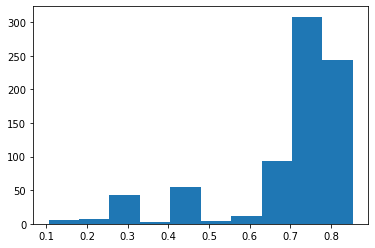

Time search : 1194.2634610609985

Cross validation score :

roc_auc = 0.8723
precision 1 = 0.9263
recall 1 = 0.7788
f1 score 1 = 0.8462

              precision    recall  f1-score   support

           0      0.888     0.966     0.925       205
           1      0.926     0.779     0.846       113

    accuracy                          0.899       318
   macro avg      0.907     0.872     0.886       318
weighted avg      0.902     0.899     0.897       318

Time validation : 0.2856893019998097

tf-idf+Naive_Bayes_ADJ_NOUN_lem Model : 

  Total time : 1196.114 and n_iter : 2487
Best parameters:  {'clf__alpha': 0.1545217992945851, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8208


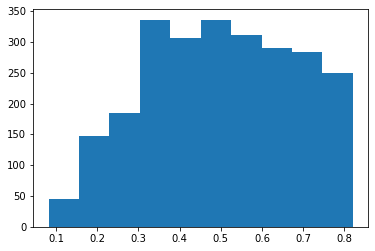

Time search : 1196.325730274999

Cross validation score :

roc_auc = 0.8487
precision 1 = 0.9529
recall 1 = 0.7168
f1 score 1 = 0.8182

              precision    recall  f1-score   support

           0      0.863     0.980     0.918       205
           1      0.953     0.717     0.818       113

    accuracy                          0.887       318
   macro avg      0.908     0.849     0.868       318
weighted avg      0.895     0.887     0.882       318

Time validation : 0.25037795699972776

tf-idf+SGDClassifier_ADJ_NOUN_lem Model : 

  Total time : 1190.019 and n_iter : 820
Best parameters:  {'clf__alpha': 0.0009530241229864969, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.8766


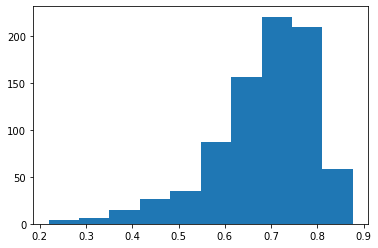

Time search : 1190.2551333779993

Cross validation score :

roc_auc = 0.872
precision 1 = 0.8393
recall 1 = 0.8319
f1 score 1 = 0.8356

              precision    recall  f1-score   support

           0      0.908     0.912     0.910       205
           1      0.839     0.832     0.836       113

    accuracy                          0.884       318
   macro avg      0.874     0.872     0.873       318
weighted avg      0.883     0.884     0.884       318

Time validation : 0.2788522869996086

tf-idf+Logistic_Regression_ADJ_NOUN_lem Model : 

  Total time : 1191.027 and n_iter : 782
Best parameters:  {'clf__C': 0.03589191877784694, 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=50), 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8636


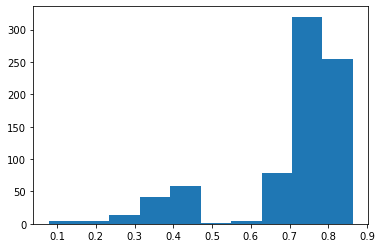

Time search : 1191.2886733750001

Cross validation score :

roc_auc = 0.892
precision 1 = 0.9208
recall 1 = 0.823
f1 score 1 = 0.8692

              precision    recall  f1-score   support

           0      0.908     0.961     0.934       205
           1      0.921     0.823     0.869       113

    accuracy                          0.912       318
   macro avg      0.914     0.892     0.901       318
weighted avg      0.912     0.912     0.911       318

Time validation : 0.667269794999811

Fasttext_Attention Model : 

{'hidden_unit': 125, 'learning_rate': 0.001, 'dropout_rate': 0.41617558062939375}
oof_val score
f1
Metric
0.8133971291866029
{'hidden_unit': 125, 'learning_rate': 0.01, 'dropout_rate': 0.4919209459111793}
oof_val score
f1
Metric
0.7804878048780486
{'hidden_unit': 129, 'learning_rate': 0.001, 'dropout_rate': 0.4502350507409341}
oof_val score
f1
Metric
0.8071748878923767
{'hidden_unit': 125, 'learning_rate': 0.01, 'dropout_rate': 0.41852485315233856}
oof_val score
f1
Me

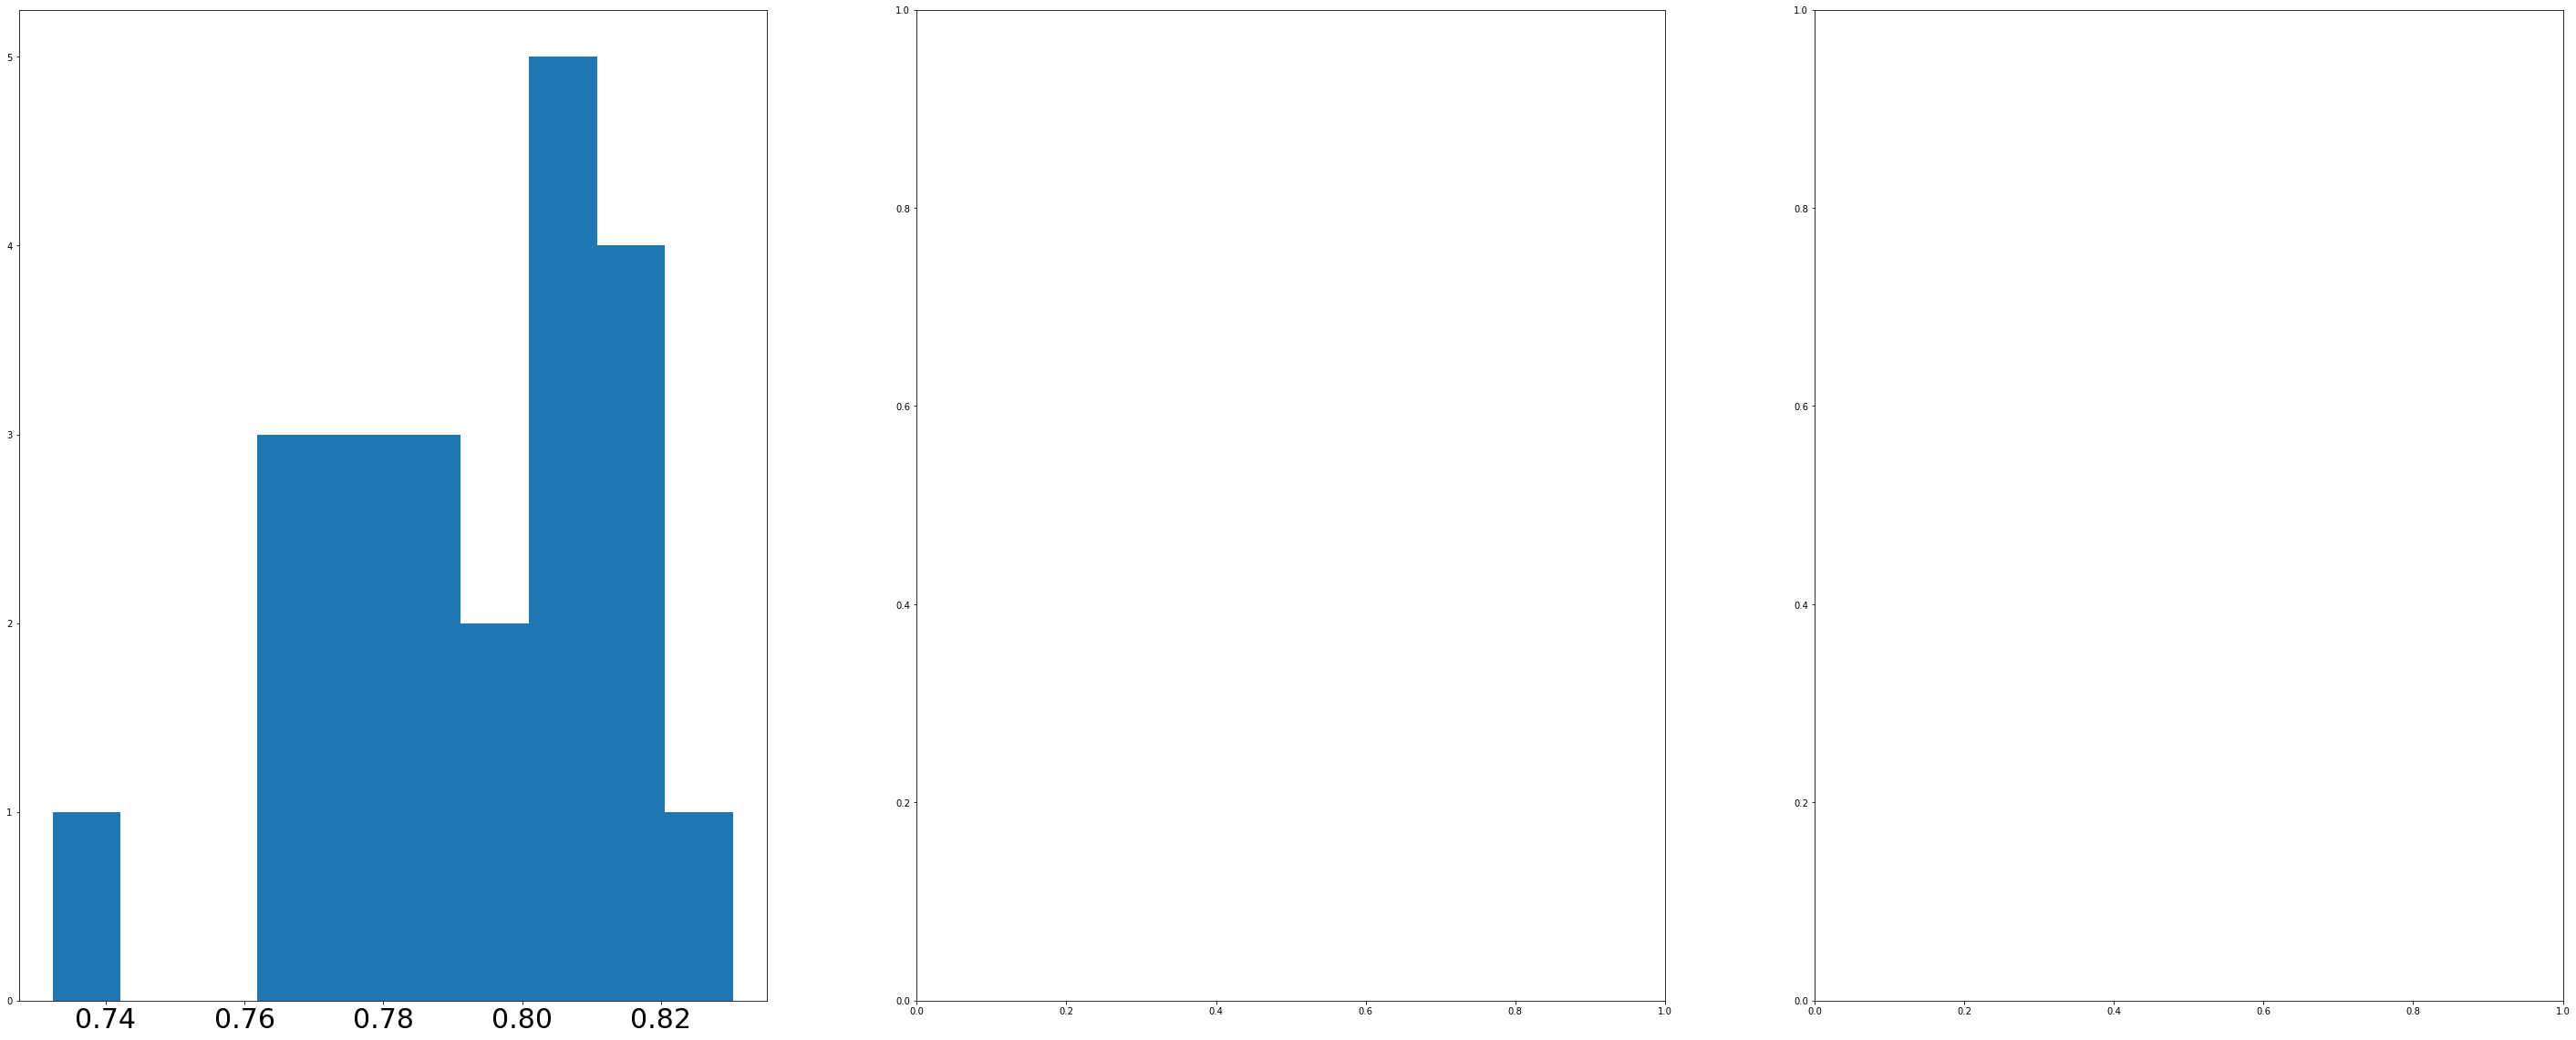

Time search : 1250.7022978610003
Epoch 1/50
16/16 [==============================] - 5s 109ms/step - loss: 0.6503 - accuracy: 0.7598 - val_loss: 0.6204 - val_accuracy: 0.6875
Epoch 2/50
16/16 [==============================] - 1s 56ms/step - loss: 0.4699 - accuracy: 0.7858 - val_loss: 0.6807 - val_accuracy: 0.6562
Epoch 3/50
16/16 [==============================] - 1s 42ms/step - loss: 0.3662 - accuracy: 0.8437 - val_loss: 0.5224 - val_accuracy: 0.7656
Epoch 4/50
16/16 [==============================] - 1s 42ms/step - loss: 0.1999 - accuracy: 0.9224 - val_loss: 0.5964 - val_accuracy: 0.7812
Epoch 5/50
16/16 [==============================] - 1s 42ms/step - loss: 0.2858 - accuracy: 0.8997 - val_loss: 0.5393 - val_accuracy: 0.7812
Epoch 6/50
16/16 [==============================] - 1s 42ms/step - loss: 0.1936 - accuracy: 0.9120 - val_loss: 0.4633 - val_accuracy: 0.7812
Epoch 7/50
16/16 [==============================] - 1s 42ms/step - loss: 0.1455 - accuracy: 0.9408 - val_loss: 0.6534 - 

Downloading:   0%|          | 0.00/811k [00:00<?, ?B/s]

{'learning_rate': 0.0001, 'dropout_rate': 0.34089464868228087}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.
Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expecte

oof_val score
f1
Metric
0.9553571428571428
{'learning_rate': 0.0001, 'dropout_rate': 0.42087408331148163}
  1%|          | 1/100 [05:18<8:44:42, 318.00s/trial, best loss: -0.9553571428571428]

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.
Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expecte

oof_val score
f1
Metric
0.9411764705882353
{'learning_rate': 0.0001, 'dropout_rate': 0.399305425254336}
  2%|▏         | 2/100 [10:19<8:23:15, 308.11s/trial, best loss: -0.9553571428571428]

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.
Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expecte

oof_val score
f1
Metric
0.9400921658986174
{'learning_rate': 0.0001, 'dropout_rate': 0.14830667794635277}
  3%|▎         | 3/100 [15:21<8:14:03, 305.61s/trial, best loss: -0.9553571428571428]

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.
Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expecte

oof_val score
f1
Metric
0.9545454545454545
  4%|▍         | 4/100 [20:43<8:17:35, 310.99s/trial, best loss: -0.9553571428571428]
Best parameters:  {'dropout_rate': 0.34089464868228087, 'learning_rate': 0.0001}
Mean cross-validated score of the best_estimator:  0.9554


Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


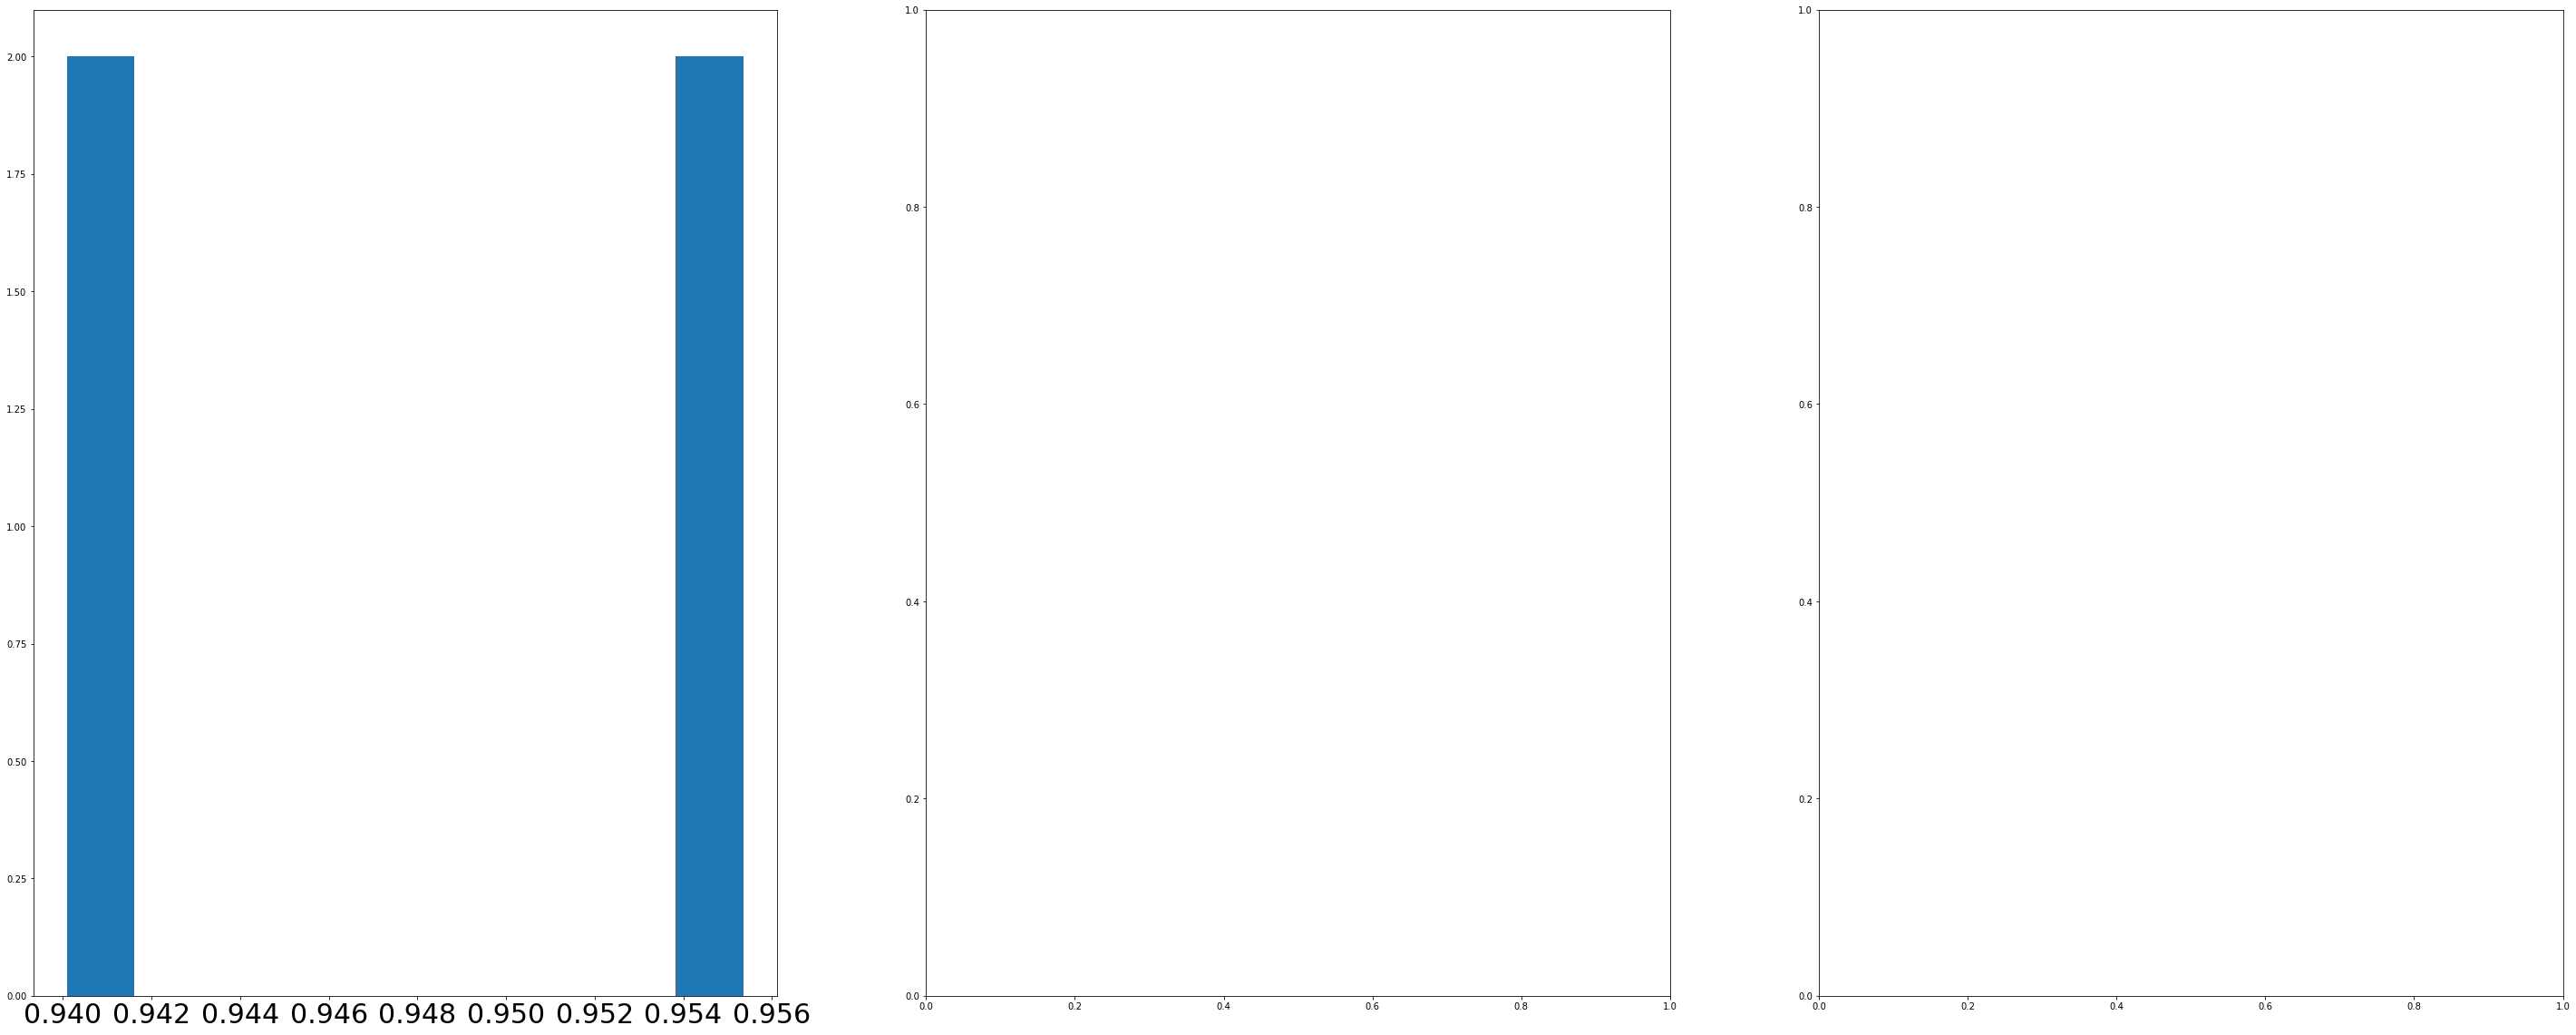

Time search : 1336.784093188


Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 25s 408ms/step - loss: 0.5939 - accuracy: 0.6374 - val_loss: 0.2867 - val_accuracy: 0.9219
Epoch 2/50
16/16 [==============================] - 4s 280ms/step - loss: 0.2812 - accuracy: 0.9233 - val_loss: 0.1595 - val_accuracy: 0.9844
Epoch 3/50
16/16 [==============================] - 4s 276ms/step - loss: 0.1458 - accuracy: 0.9724 - val_loss: 0.1830 - val_accuracy: 0.9375
Epoch 4/50
16/16 [==============================] - 4s 274ms/step - loss: 0.1077 - accuracy: 0.9769 - val_loss: 0.1716 - val_accuracy: 0.9531
Epoch 5/50
16/16 [==============================] - 4s 280ms/step - loss: 0.0663 - accuracy: 0.9910 - val_loss: 0.1032 - val_accuracy: 0.9688
Epoch 6/50
16/16 [==============================] - 4s 274ms/step - loss: 0.0406 - accuracy: 0.9950 - val_loss: 0.1226 - val_accuracy: 0.9688
Epoch 7/50
16/16 [==============================] - 4s 274ms/step - loss: 0.0221 - accuracy: 0.9980 - val_loss: 0.1611 - val_accuracy: 0.9531
Epoch

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 25s 432ms/step - loss: 0.5627 - accuracy: 0.6386 - val_loss: 0.2189 - val_accuracy: 0.9375
Epoch 2/50
16/16 [==============================] - 4s 274ms/step - loss: 0.1202 - accuracy: 0.9563 - val_loss: 0.3120 - val_accuracy: 0.8906
Epoch 3/50
16/16 [==============================] - 4s 278ms/step - loss: 0.0702 - accuracy: 0.9810 - val_loss: 0.2336 - val_accuracy: 0.9375
Epoch 4/50
16/16 [==============================] - 4s 276ms/step - loss: 0.0919 - accuracy: 0.9720 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 5/50
16/16 [==============================] - 4s 279ms/step - loss: 0.1203 - accuracy: 0.9731 - val_loss: 0.1894 - val_accuracy: 0.9375
Epoch 6/50
16/16 [==============================] - 4s 274ms/step - loss: 0.0170 - accuracy: 0.9969 - val_loss: 0.4943 - val_accuracy: 0.8750
Epoch 7/50
16/16 [==============================] - 4s 280ms/step - loss: 0.0516 - accuracy: 0.9879 - val_loss: 0.1669 - val_accuracy: 0.9531
Epoch

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 25s 422ms/step - loss: 0.5054 - accuracy: 0.7976 - val_loss: 0.2144 - val_accuracy: 0.9375
Epoch 2/50
16/16 [==============================] - 4s 280ms/step - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.1227 - val_accuracy: 0.9688
Epoch 3/50
16/16 [==============================] - 4s 280ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.3879 - val_accuracy: 0.9062
Epoch 4/50
16/16 [==============================] - 4s 276ms/step - loss: 0.1146 - accuracy: 0.9435 - val_loss: 0.1196 - val_accuracy: 0.9688
Epoch 5/50
16/16 [==============================] - 4s 275ms/step - loss: 0.0237 - accuracy: 0.9964 - val_loss: 0.1760 - val_accuracy: 0.9531
Epoch 6/50
16/16 [==============================] - 4s 280ms/step - loss: 0.0594 - accuracy: 0.9726 - val_loss: 0.2028 - val_accuracy: 0.9531
Epoch 7/50
16/16 [==============================] - 4s 274ms/step - loss: 0.0505 - accuracy: 0.9913 - val_loss: 0.1616 - val_accuracy: 0.9531
Epoch

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 26s 537ms/step - loss: 0.5230 - accuracy: 0.7026 - val_loss: 0.1954 - val_accuracy: 0.9365
Epoch 2/50
16/16 [==============================] - 4s 280ms/step - loss: 0.2456 - accuracy: 0.9452 - val_loss: 0.1484 - val_accuracy: 0.9524
Epoch 3/50
16/16 [==============================] - 5s 288ms/step - loss: 0.1429 - accuracy: 0.9607 - val_loss: 0.1827 - val_accuracy: 0.9206
Epoch 4/50
16/16 [==============================] - 4s 282ms/step - loss: 0.0302 - accuracy: 0.9949 - val_loss: 0.2026 - val_accuracy: 0.9206
Epoch 5/50
16/16 [==============================] - 4s 280ms/step - loss: 0.0628 - accuracy: 0.9847 - val_loss: 0.2463 - val_accuracy: 0.9206
Epoch 6/50
16/16 [==============================] - 5s 286ms/step - loss: 0.0324 - accuracy: 0.9950 - val_loss: 0.2421 - val_accuracy: 0.9206
Kfold # 3  : train loss = 0.24680162966251373  and val loss = 0.14836475253105164


Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 27s 496ms/step - loss: 0.5380 - accuracy: 0.6935 - val_loss: 0.2066 - val_accuracy: 0.9524
Epoch 2/50
16/16 [==============================] - 5s 287ms/step - loss: 0.2120 - accuracy: 0.9236 - val_loss: 0.1835 - val_accuracy: 0.9365
Epoch 3/50
16/16 [==============================] - 5s 292ms/step - loss: 0.1012 - accuracy: 0.9699 - val_loss: 0.3159 - val_accuracy: 0.9206
Epoch 4/50
16/16 [==============================] - 4s 281ms/step - loss: 0.1399 - accuracy: 0.9698 - val_loss: 0.1398 - val_accuracy: 0.9524
Epoch 5/50
16/16 [==============================] - 5s 288ms/step - loss: 0.1278 - accuracy: 0.9616 - val_loss: 0.1612 - val_accuracy: 0.9683
Epoch 6/50
16/16 [==============================] - 4s 281ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.1651 - val_accuracy: 0.9683
Epoch 7/50
16/16 [==============================] - 4s 281ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.1956 - val_accuracy: 0.9524
Epoch

In [9]:
bml.train()

# Ensemble

In [10]:
bml.ensemble()


Blend Model : 


Cross validation score :

roc_auc = 0.9574
precision 1 = 0.9388
recall 1 = 0.8142
f1 score 1 = 0.872

              precision    recall  f1-score   support

           0      0.905     0.971     0.936       205
           1      0.939     0.814     0.872       113

    accuracy                          0.915       318
   macro avg      0.922     0.892     0.904       318
weighted avg      0.917     0.915     0.914       318



# Leaderboard (Validation score)

In [11]:
leaderboard_val = bml.get_leaderboard(sort_by = sort_leaderboard, dataset = 'val')
print('\nValidation Leaderboard (threshold = 0.5)')
leaderboard_val.to_csv('./results/results_nlp/leaderboard_val.csv', index=False)
leaderboard_val


Validation Leaderboard (threshold = 0.5)


,name,accuracy_val,recall_val,precision_val,f1_val,roc_auc_val
10,BERT,0.9623,0.8938,1.0000,0.9439,0.9469
1,tf-idf+SGDClassifier,0.9151,0.8584,0.8981,0.8778,0.9024
11,BlendModel,0.9151,0.8142,0.9388,0.8720,0.9574
8,tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.9119,0.8230,0.9208,0.8692,0.8920
5,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.8994,0.7788,0.9263,0.8462,0.8723
2,tf-idf+Logistic_Regression,0.8962,0.7876,0.9082,0.8436,0.8719
7,tf-idf+SGDClassifier_ADJ_NOUN_lem,0.8836,0.8319,0.8393,0.8356,0.8720
0,tf-idf+Naive_Bayes,0.8868,0.7168,0.9529,0.8182,0.8487
3,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,0.8868,0.7168,0.9529,0.8182,0.8487
6,tf-idf+Naive_Bayes_ADJ_NOUN_lem,0.8868,0.7168,0.9529,0.8182,0.8487


In [12]:
df_oof_val = bml.Y_train.copy()
for name in bml.models.keys():
    df_oof_val[name] = bml.models[name].info_scores['oof_val']
df_oof_val

,sentiment,tf-idf+Naive_Bayes,tf-idf+SGDClassifier,tf-idf+Logistic_Regression,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,tf-idf+Naive_Bayes_ADJ_NOUN_lem,tf-idf+SGDClassifier_ADJ_NOUN_lem,tf-idf+Logistic_Regression_ADJ_NOUN_lem,Fasttext_Attention,BERT,BlendModel
353,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
21,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
216,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.727273
67,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
131,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
180,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.363636
327,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
231,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.727273


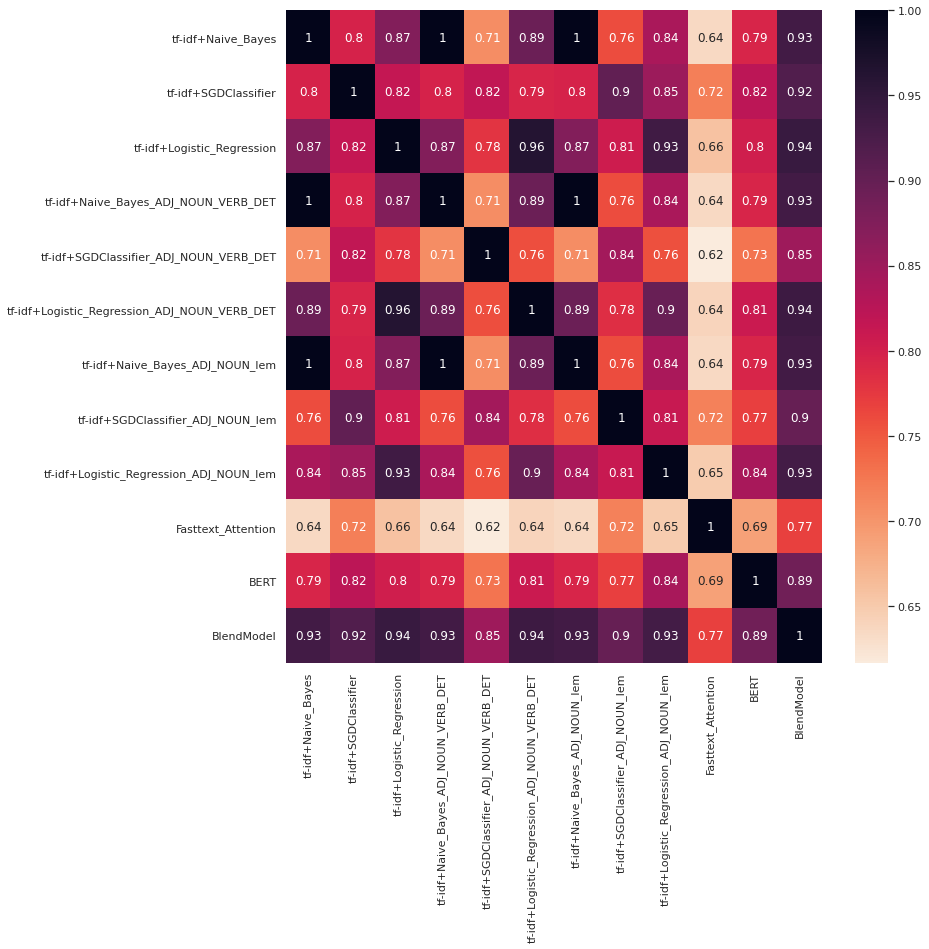

In [13]:
# correlation between oof_val predictions
bml.correlation_models()

In [14]:
df_all_results = bml.get_df_all_results()
df_all_results.to_csv('./results/results_nlp/df_all_results.csv', index=False)
df_all_results

,mean_fit_time,params,mean_test_score,std_test_score,model
0,0.032950,"{'clf__alpha': 0.14753046946741144, 'vect__tfi...",0.820822,0.063651,tf-idf+Naive_Bayes
1,0.033232,"{'clf__alpha': 0.15643050981592943, 'vect__tfi...",0.820822,0.063651,tf-idf+Naive_Bayes
2,0.033357,"{'clf__alpha': 0.14889613924782485, 'vect__tfi...",0.820822,0.063651,tf-idf+Naive_Bayes
3,0.046111,"{'clf__alpha': 0.11092629666038178, 'vect__tfi...",0.817633,0.072835,tf-idf+Naive_Bayes
4,0.033291,"{'clf__alpha': 0.10668478875493193, 'vect__tfi...",0.817633,0.072835,tf-idf+Naive_Bayes
...,...,...,...,...,...
13012,50.975941,"{'dropout_rate': 0.4090006454654091, 'hidden_u...",0.732394,0.000000,Fasttext_Attention
13013,317.993403,"{'dropout_rate': 0.34089464868228087, 'learnin...",0.955357,0.000000,BERT
13014,322.143669,"{'dropout_rate': 0.14830667794635277, 'learnin...",0.954545,0.000000,BERT
13015,301.179011,"{'dropout_rate': 0.42087408331148163, 'learnin...",0.941176,0.000000,BERT


In [15]:
df_all_results_mean = df_all_results.groupby('model').mean().sort_values('mean_test_score', ascending=False)
print('\nGridSearch information Leaderboard')
df_all_results.to_csv('./results/results_nlp/df_all_results_mean.csv', index=False)
df_all_results_mean


GridSearch information Leaderboard


,mean_fit_time,mean_test_score,std_test_score
model,,,
BERT,310.981938,0.947793,0.000000
Fasttext_Attention,56.300941,0.792904,0.000000
tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.276015,0.699373,0.087524
tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.280466,0.696889,0.089098
tf-idf+Logistic_Regression,0.259643,0.692589,0.088535
tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,0.271387,0.688932,0.115209
tf-idf+SGDClassifier,0.263482,0.686401,0.115335
tf-idf+SGDClassifier_ADJ_NOUN_lem,0.259652,0.683350,0.115204
tf-idf+Naive_Bayes,0.079325,0.504825,0.072315


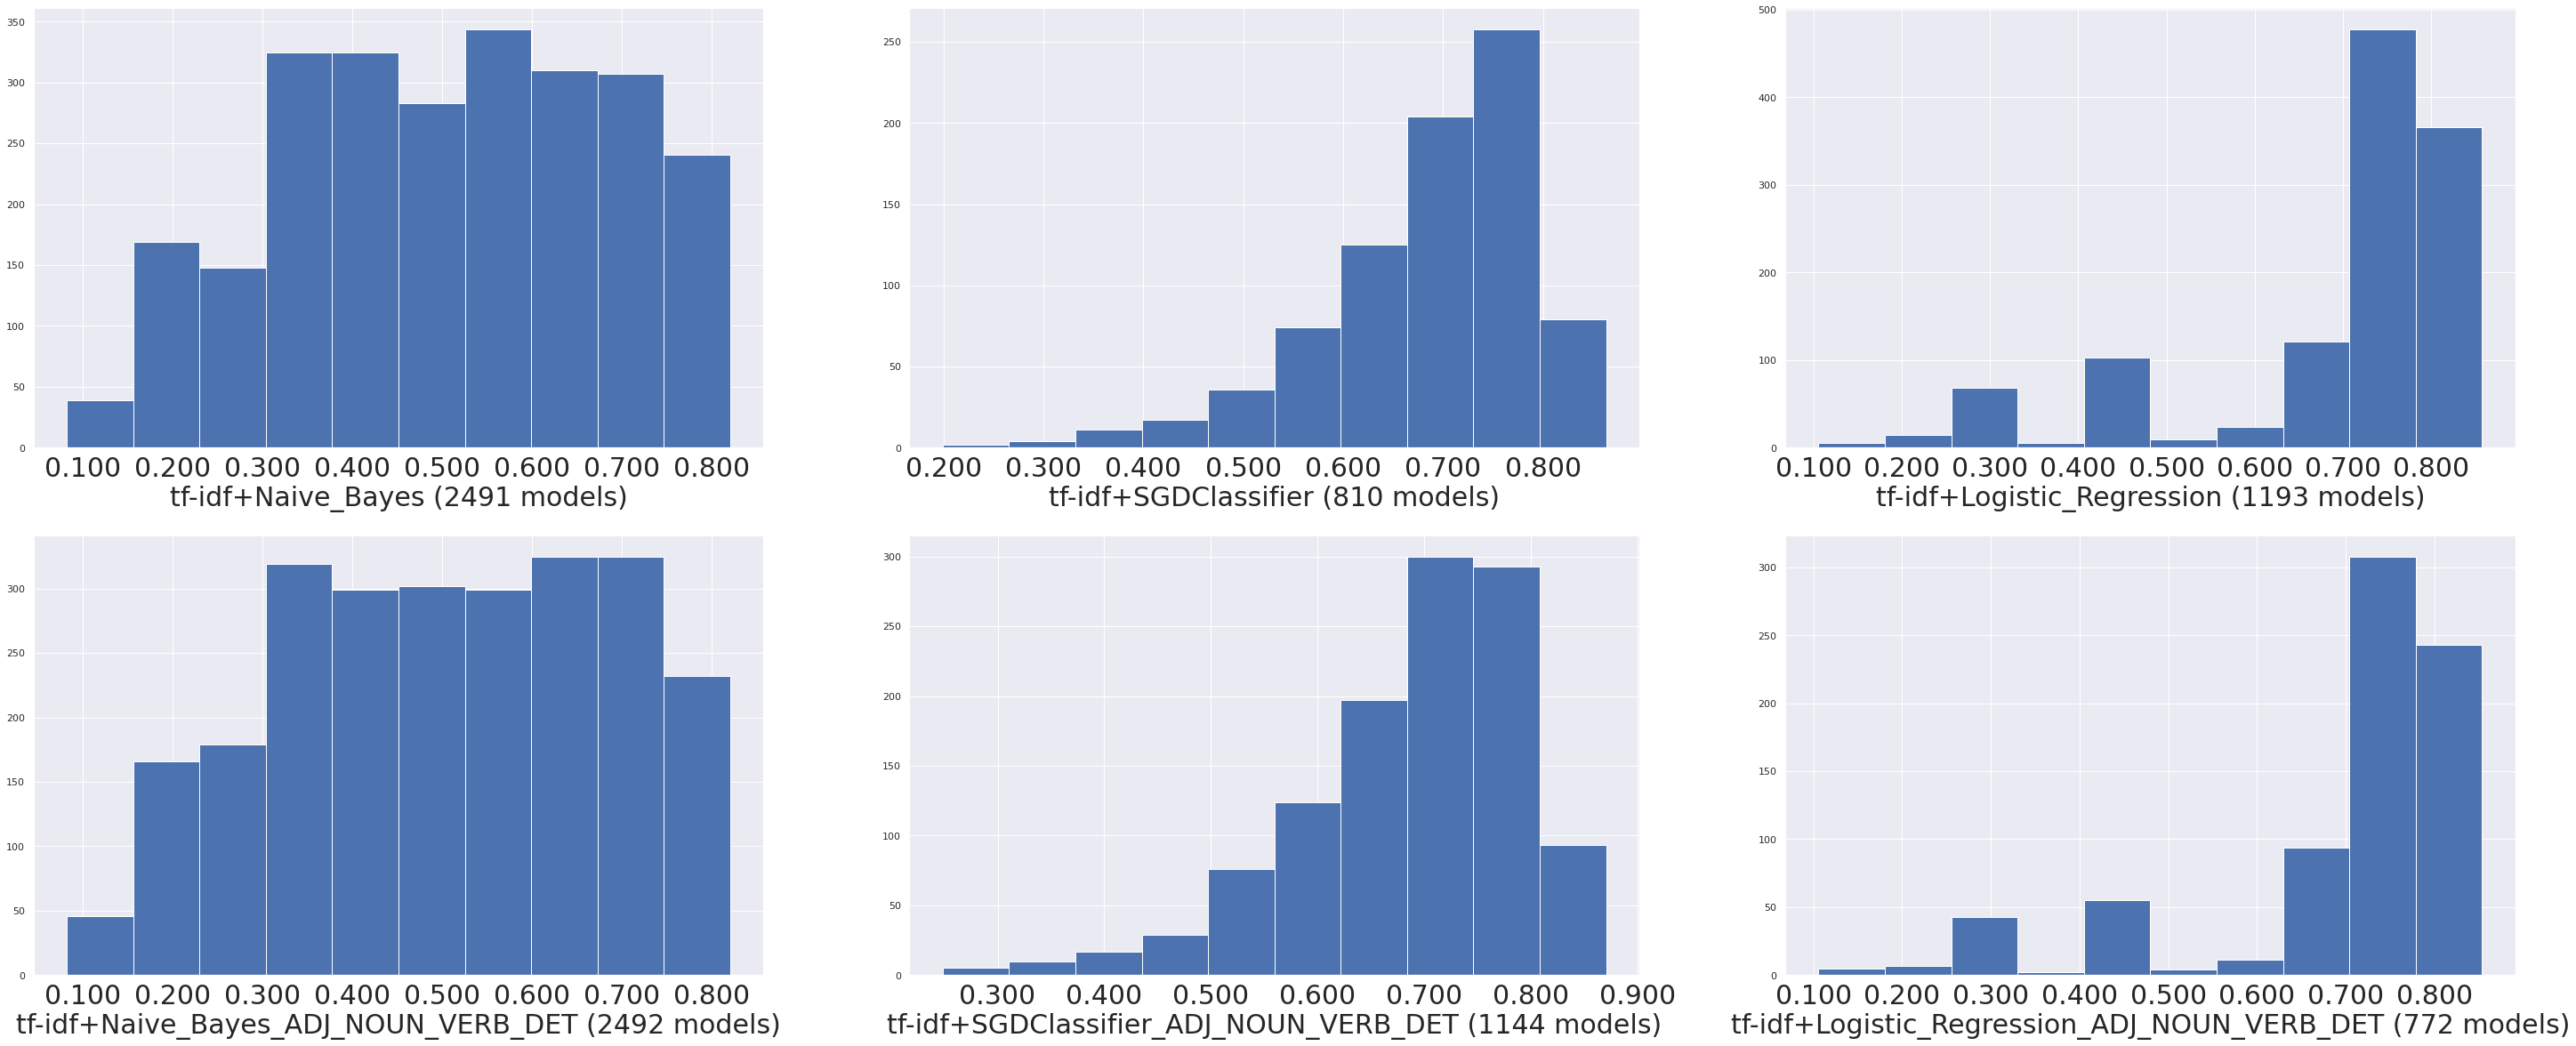

In [16]:
bml.show_distribution_scores()

In [17]:
if 'binary_proba' in bml.objective:
        bml.get_roc_curves()

# Testing

In [18]:
on_test_data = True
bml.leader_predict(on_test_data, thr_1 = thr_1_test)   # or bml.leader_predict(aml.X_test, aml.Y_test)

In [19]:
leaderboard_test = bml.get_leaderboard(sort_by=sort_leaderboard, dataset='test')
print('\nTest Leaderboard (threshold = ' + str(thr_1_test) + ')')
leaderboard_test.to_csv('./results/results_nlp/leaderboard_test.csv', index=False)
leaderboard_test


Test Leaderboard (threshold = 0.5)


,name,accuracy_test,recall_test,precision_test,f1_test,roc_auc_test
10,BERT,0.9125,0.8333,0.8696,0.8511,0.8899
2,tf-idf+Logistic_Regression,0.8750,0.7917,0.7917,0.7917,0.8512
1,tf-idf+SGDClassifier,0.8625,0.7917,0.7600,0.7755,0.8423
11,BlendModel,0.8750,0.7083,0.8500,0.7727,0.9286
8,tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.8500,0.7500,0.7500,0.7500,0.8214
7,tf-idf+SGDClassifier_ADJ_NOUN_lem,0.8375,0.7917,0.7037,0.7451,0.8244
0,tf-idf+Naive_Bayes,0.8625,0.6667,0.8421,0.7442,0.8065
3,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,0.8625,0.6667,0.8421,0.7442,0.8065
6,tf-idf+Naive_Bayes_ADJ_NOUN_lem,0.8625,0.6667,0.8421,0.7442,0.8065
5,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.8375,0.7083,0.7391,0.7234,0.8006


In [20]:
df_prediction = bml.dataframe_predictions
df_prediction

,y_true,tf-idf+Naive_Bayes,tf-idf+SGDClassifier,tf-idf+Logistic_Regression,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,tf-idf+Naive_Bayes_ADJ_NOUN_lem,tf-idf+SGDClassifier_ADJ_NOUN_lem,tf-idf+Logistic_Regression_ADJ_NOUN_lem,Fasttext_Attention,BERT,BlendModel
0,1,0,0,1,0,0,1,0,1,1,0,1,0.455
1,0,0,1,0,0,1,0,0,1,0,0,0,0.273
2,0,0,0,0,0,0,0,0,0,0,0,0,0.000
3,1,1,1,1,1,1,1,1,1,1,1,1,1.000
4,0,0,0,0,0,1,0,0,1,0,1,0,0.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,0,0,0.000
76,0,0,0,0,0,0,0,0,0,0,0,0,0.000
77,0,0,0,0,0,0,0,0,0,0,0,0,0.000
78,0,0,0,0,0,0,0,0,0,1,0,0,0.091


# Extraction of influent words 

In [21]:
from extraction_words import *

In [22]:
pr = {0: 'NEGATIVE', 1: 'POSITIVE'}
n_influent_word = 10
type_data = 'train'  # 'test'

In [23]:
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
from IPython.core.display import display, HTML

def extract_influent_word(bml, type_data, n_influent_word, pr):
    """ extraction of influential words : highlight the words with the highest weight
        for 'Fasttext_Attention' and 'BERT' model
    Args:
        bml : class from BinaryML with 'Fasttext_Attention' and 'BERT' model already trained
        type_data (str) : 'train' or 'test', use documents from train or test dataset
        n_influent_word (int) : number of words to highlight by documents
        pr (dict) : (not use for the moment)
    """

    if 'binary_proba' in bml.objective:
        print(" Extraction doesn't work with objective = binary_proba ")
        return None

    if type_data == 'train':
        X = bml.X_train.copy()
        Y = bml.Y_train.copy()
    else:
        X = bml.X_test.copy()
        Y = bml.Y_test.copy()

    dataset = X.iloc[:, bml.column_text].copy().reset_index(drop=True)
    target = Y[bml.target[0]].copy().reset_index(drop=True)

    # tokenize for FastText
    if 'Fasttext_Attention' in bml.models.keys():
        token_d = bml.models['Fasttext_Attention'].preprocessing_transform(X)['tok']

        fixed_weights_attention = bml.models['Fasttext_Attention'].best_model.layers[-2].get_weights()[0]
        features_dim = fixed_weights_attention.shape[0]
        biais_attention = bml.models['Fasttext_Attention'].best_model.layers[-2].get_weights()[1]

        # Extraction Model (outputs layer outputs from bml.models['Fasttext_Attention'].best_model)
        extract_model_fasttext_attention = tf.keras.Model(inputs=bml.models['Fasttext_Attention'].best_model.input,
                                                          outputs=(
                                                          bml.models['Fasttext_Attention'].best_model.layers[-4].output,
                                                          bml.models['Fasttext_Attention'].best_model.layers[-1].output))

    if 'BERT' in bml.models.keys():
        x_preprocessed = bml.models['BERT'].preprocessing_transform(X)
        ids_d = x_preprocessed[0]
        att_d = x_preprocessed[1]
        tok_d = x_preprocessed[2]
        # cha_d = cha

        all_layer_weights_camembert = bml.models['BERT'].best_model.layers[-1].get_weights()[0]
        # Extraction Model (outputs layer outputs from bml.models['BERT'].best_model)
        extract_model_camembert = tf.keras.Model(inputs=bml.models['BERT'].best_model.input,
                                                 outputs=(bml.models['BERT'].best_model.layers[-4].output,
                                                          bml.models['BERT'].best_model.layers[-1].output))

    html = ''
    for k in range(50):

        if len(dataset[k]) > 500: continue  # trop large à afficher

        list_pred = []
        if 'Fasttext_Attention' in bml.models.keys():
            # USE EXTRACT MODEL
            embedding_output, pred_vec = extract_model_fasttext_attention.predict([token_d[k:k + 1]])
            embedding_output = np.squeeze(embedding_output[0])  # dim (MAX_LEN,256)
            pred = np.argmax(pred_vec)
            list_pred.append(pred)
            weights_attention = attention_weight(embedding_output, fixed_weights_attention, biais_attention,
                                                 bml.models['Fasttext_Attention'].maxlen)
            weights_attention = np.squeeze(weights_attention[0])

        if 'BERT' in bml.models.keys():
            # USE EXTRACT MODEL
            embedding_output_3, pred_vec_3 = extract_model_camembert.predict(
                [ids_d[k:k + 1, :], att_d[k:k + 1, :], tok_d[k:k + 1, :]])
            embedding_output_3 = np.squeeze(embedding_output_3[0])  # dim (MAX_LEN,768)
            pred_3 = np.argmax(pred_vec_3)
            list_pred.append(pred_3)
            layer_weights_3 = all_layer_weights_camembert[:, pred_3]
            final_output_3 = np.dot(embedding_output_3, layer_weights_3)

        if target[k] not in list_pred: continue  # ne pas afficher les mal classés

        # DISPLAY TEXT
        # html = ''
        info = 'Train row %i. Predict %s.   True label is %s' % (k, target[k], target[k])
        html += info + '<br><br>'

        if 'Fasttext_Attention' in bml.models.keys():
            idx = list(token_d[k:k + 1][0]).count(0)
            nb_tok = bml.models['Fasttext_Attention'].maxlen - idx
            if nb_tok < n_influent_word * 2:
                n_influent_word__ = int(nb_tok / 2)
            else:
                n_influent_word__ = n_influent_word

            weights_attention = weights_attention[:-idx]
            v = np.argsort(weights_attention)
            mx = weights_attention[v[-1]];
            x = max(-n_influent_word, -len(v))
            mn = weights_attention[v[x]]

            html += '<b>Attention &emsp;&nbsp;:</b>'
            if pred == target[k]:
                list_ = []
                for j in range(len(weights_attention)):
                    x = (weights_attention[j] - mn) / (mx - mn)
                    list_.append(x)
                g = list(np.argsort(list_))[::-1]
                for j in range(len(weights_attention)):
                    if j in g[:n_influent_word__]:
                        x = 1 - g.index(j) * 0.7 / n_influent_word
                    else:
                        x = 0

                    html += ' '
                    html += "<span style='background:{};font-family:monospace'>".format('rgba(255,255,0,%f)' % x)
                    html += bml.models['Fasttext_Attention'].tokenizer.sequences_to_texts(token_d[k:k + 1, j:j + 1])[0]
                    html += "</span>"
            html += "<br>"

        if 'BERT' in bml.models.keys():
            idx = np.sum(att_d[k,])
            if idx < n_influent_word * 2:
                n_influent_word__ = int(idx / 2)
            else:
                n_influent_word__ = n_influent_word

            ## technique 3
            v = np.argsort(final_output_3[:idx - 1])
            mx = final_output_3[v[-1]];
            x = max(-n_influent_word, -len(v))
            mn = final_output_3[v[x]]

            # DISPLAY TEXT
            html += '<b>Camembert :</b>'
            tokenize = bml.models['BERT'].tokenizer.tokenize(bml.models['BERT'].tokenizer.decode(ids_d[k]))
            list_ = []
            if pred_3 == target[k]:
                for j in range(1, idx):
                    x = (final_output_3[j] - mn) / (mx - mn)
                    list_.append(x)
                g = list(np.argsort(list_))[::-1]
                for j in range(1, idx):
                    if j - 1 in g[:n_influent_word__]:
                        x = 1 - g.index(j - 1) * 0.7 / n_influent_word
                    else:
                        x = 0
                    if tokenize[j][0] == '▁':
                        html += ' '
                    html += "<span style='background:{};font-family:monospace'>".format('rgba(255,255,0,%f)' % x)
                    html += bml.models['BERT'].tokenizer.decode([ids_d[k, j]])
                    html += "</span>"
            html += "<br>"

        html += '<br><br><br>'
    display(HTML(html))
    return html

In [24]:
if 'Fasttext_Attention' in bml.models.keys() or 'BERT' in bml.models.keys():
    html = extract_influent_word(bml, type_data, n_influent_word, pr)
    
    Html_file= open("/kaggle/working/extract_word.html","w")
    Html_file.write(html)
    Html_file.close()